In [8]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('emails.csv')

In [5]:
df.shape

(5172, 3002)

In [6]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#input data
x=df.drop(['Email No.','Prediction'],axis = 1)
#output data
y=df['Prediction']
x.shape

(5172, 3000)

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3000 entries, the to dry
dtypes: int64(3000)
memory usage: 118.4 MB


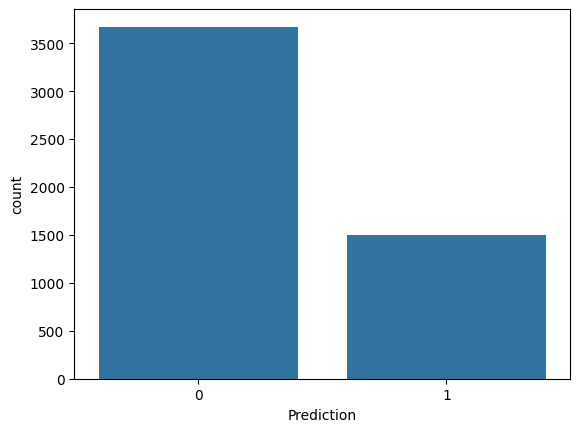

In [9]:
sns.countplot(x=y);

In [10]:
y.value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [11]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]], shape=(5172, 3000))

In [12]:
#Cross-Validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state = 0, test_size = 0.25)
x_scaled.shape

(5172, 3000)

In [13]:
x_train.shape

(3879, 3000)

In [14]:
x_test.shape

(1293, 3000)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
#Creating object
knn = KNeighborsClassifier(n_neighbors=5)

#Train the algorithm
knn.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


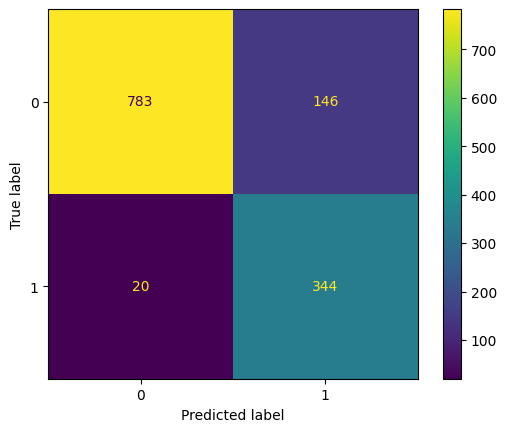

In [18]:
#Predict on test data
y_pred = knn.predict(x_test)
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [19]:
y_test.value_counts()

Prediction
0    929
1    364
Name: count, dtype: int64

In [20]:
accuracy_score(y_test, y_pred)

0.871616395978345

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [23]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf')
svm.fit(x_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.9450889404485692

In [25]:
svm = SVC(kernel = 'linear')

svm.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [26]:
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

0.9767981438515081